# Introduction

Calgary, Alberta is most often noted as one of Canada's fastest growing cities, putting it in a position to become one of the top 3 biggest cities in Canada.

The client is an entrepreneur who runs a successful Yoga Studio in Vancouver, and wishes to open a Yoga Studio in the city of Calgary, believing it to be an ideal place to open a second studio due to its growth. They have enlisted your help to further confirm and determine if Calgary is indeed a good location to expand the business.


**Business Problem**

They want you to collect data on the different businesses that currently exist within Calgary and to help them determine if expansion is a good idea, and if so - where in Calgary it is best to expand.

They want you to account for the following points: 
<ol>
<li> Density - how many other yoga studios are located in the surrounding area? </li>
<li> Proximity to Downtown Core - how close is it to the Downtown Core? </li>
<li> Risk Factor - overally, how risky is it to open a yoga studio in Calgary? </li>
</ol> 



# Data

The neighbourhood information for Calgary can be found using the link to a Wikipedia page below. The page outlines the different Postal Codes in addition to their corresponding Boroughs, Neighbourhoods, Latitude and Longitudes.

Postal Codes in Calgary: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T

Below is an example of the Information as displayed on Wikepedia.
<table>
  <thead>
    <tr>
      <th>Postal Code</th>
      <th>Borough</th>
      <th>Neighbourhood</th>
      <th>Latitude</th>
      <th>Longitude</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>T2A</td>
      <td>Calgary</td>
      <td>Penbrooke Meadows, Marlborough </td>  
      <td>51.049680</td>  
      <td>-113.964320</td>    
    </tr>
  </tbody>
</table>

Once the data has been cleaned and organized, Foursquare will be used to attain the top venues for each neighbourhood. This information will be then used to create clusters throughout the city.

The top venues and their corresponding clusters will be analyzed to determine how similar/dissimilar they are to each other, and subsequently, provide more information as to the types of investors and business owners that would be interested in doing business in the city.


# Methodology

In [1]:
#Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from urllib.request import urlopen
from bs4 import BeautifulSoup

### Calgary Data

In [2]:
url_1 = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_T'
html = urlopen(url_1)

##### Using Beautiful soup to perform web scraping on the wikepedia page.

In [3]:
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

In [4]:
col_labels1 = soup.find_all('th')
all_header1 = []
col_str1 = str(col_labels1)
cleantext2_1 = BeautifulSoup(col_str1, "lxml").get_text()
all_header1.append(cleantext2_1)
print(all_header1)

['[Postal Code\n, Borough\n, Neighborhood\n, Latitude\n, Longitude\n, Canadian postal codes\n]']


In [5]:
rows = soup.find_all('tr')
import re

list_rows_1 = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    clean = re.compile('<.*?>')
    clean2 = (re.sub(clean, '',str_cells))
    list_rows_1.append(clean2)
print(clean2)
type(clean2)

[A
, B
, C
, E
, G
, H
, J
, K
, L
, M
, N
, P
, R
, S
, T
, V
, X
, Y
]


str

In [6]:
df_1 = pd.DataFrame(list_rows_1)
df_1.head(25)

,0
0,"[T1AMedicine HatCentral\n, T2ACalgary(Penbrook..."
1,"[T1BMedicine HatSouth\n, T2BCalgary(Forest Law..."
2,"[T1CMedicine HatNorth\n, T2CCalgary(Lynnwood R..."
3,"[T1ENot assigned\n, T2ECalgary(Bridgeland / Gr..."
4,"[T1GTaber\n, T2GCalgary(Inglewood / Burnsland ..."
5,"[T1HLethbridgeNorth\n, T2HCalgary(Highfield / ..."
6,"[T1JLethbridgeWest and Central\n, T2JCalgary(Q..."
7,"[T1KLethbridgeWest and South\n, T2KCalgary(Tho..."
8,"[T1LBanff\n, T2LCalgary(Brentwood / Collingwoo..."
9,"[T1MCoaldale\n, T2MCalgary(Mount Pleasant / Ca..."


In [7]:
df_1 = df_1.drop(df_1.index[0:20])
df_1.head(25)

,0
20,[]
21,"[T1A\n, Medicine Hat\n, Central Medicine Hat\n..."
22,"[T2A\n, Calgary\n, Penbrooke Meadows, Marlboro..."
23,"[T3A\n, Calgary\n, Dalhousie, Edgemont, Hampto..."
24,"[T4A\n, Airdrie\n, East Airdrie\n, 51.272450\n..."
25,"[T5A\n, Edmonton\n, West Clareview, East Londo..."
26,"[T6A\n, Edmonton\n, North Capilano\n, 53.5483\..."
27,"[T7A\n, Drayton Valley\n, Not assigned\n, 53.2..."
28,"[T8A\n, Sherwood Park\n, West Sherwood Park\n,..."
29,"[T9A\n, Wetaskiwin\n, Not assigned\n, 52.9741\..."


In [8]:
df_1 = df_1[0].str.split('\n,',4,expand=True)
df_1.head(25)

,0,1,2,3,4
20,[],None,None,None,None
21,[T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250\n]
22,[T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320\n]
23,[T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158\n]
24,[T4A,Airdrie,East Airdrie,51.272450,-113.986980\n]
25,[T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413\n]
26,[T6A,Edmonton,North Capilano,53.5483,-113.408\n]
27,[T7A,Drayton Valley,Not assigned,53.2165,-114.9893\n]
28,[T8A,Sherwood Park,West Sherwood Park,53.519,-113.3216\n]
29,[T9A,Wetaskiwin,Not assigned,52.9741,-113.3646\n]


In [9]:
df_1[0] = df_1[0].str.strip('[')
df_1[4] = df_1[4].str.strip(']')

In [10]:
headers_1 = pd.DataFrame(all_header1)
headers_1.head()

,0
0,"[Postal Code\n, Borough\n, Neighborhood\n, Lat..."


In [11]:
headers_1 = headers_1[0].str.split(',',expand=True)
headers_1.head()

,0,1,2,3,4,5
0,[Postal Code\n,Borough\n,Neighborhood\n,Latitude\n,Longitude\n,Canadian postal codes\n]


In [12]:
headers_1[0] = headers_1[0].str.strip('[')
headers_1[5] = headers_1[5].str.strip(']')
headers_1 = headers_1.replace('\n','',regex=True)
headers_1 = headers_1.replace(' ','',regex=True)
headers_1.head()

,0,1,2,3,4,5
0,PostalCode,Borough,Neighborhood,Latitude,Longitude,Canadianpostalcodes


In [13]:
frame1 = [headers_1, df_1]
calg = pd.concat(frame1)
calg_data = calg.rename(columns=calg.iloc[0]).reset_index(drop=True)
calg_data.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Canadianpostalcodes
0,PostalCode,Borough,Neighborhood,Latitude,Longitude,Canadianpostalcodes
1,],None,None,None,None,NaN
2,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250\n,NaN
3,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320\n,NaN
4,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158\n,NaN


In [14]:
calg_data.shape

(191, 6)

In [15]:
calg_data= calg_data.drop(calg_data.index[0])
calg_data.head(15)

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Canadianpostalcodes
1,],None,None,None,None,NaN
2,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250\n,NaN
3,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320\n,NaN
4,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158\n,NaN
5,T4A,Airdrie,East Airdrie,51.272450,-113.986980\n,NaN
6,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413\n,NaN
7,T6A,Edmonton,North Capilano,53.5483,-113.408\n,NaN
8,T7A,Drayton Valley,Not assigned,53.2165,-114.9893\n,NaN
9,T8A,Sherwood Park,West Sherwood Park,53.519,-113.3216\n,NaN
10,T9A,Wetaskiwin,Not assigned,52.9741,-113.3646\n,NaN


In [16]:
calg_data = calg_data.loc[:, calg_data.columns.notnull()]
calg_data.columns = calg_data.columns.str.replace(' ', '')
calg_data = calg_data.drop(columns=['Canadianpostalcodes'])
calg_data = calg_data.replace('\n','', regex=True).reset_index(drop=True)

calg_data.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,],None,None,None,None
1,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
2,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
3,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
4,T4A,Airdrie,East Airdrie,51.272450,-113.986980
5,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
6,T6A,Edmonton,North Capilano,53.5483,-113.408
7,T7A,Drayton Valley,Not assigned,53.2165,-114.9893
8,T8A,Sherwood Park,West Sherwood Park,53.519,-113.3216
9,T9A,Wetaskiwin,Not assigned,52.9741,-113.3646


In [17]:
calg_data= calg_data.drop(calg_data.index[0])

In [18]:
calg_data = calg_data.dropna(axis=0, how='any')
calg_data

,PostalCode,Borough,Neighborhood,Latitude,Longitude
1,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
2,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
3,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
4,T4A,Airdrie,East Airdrie,51.272450,-113.986980
5,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
...,...,...,...,...,...
183,T0NNot in use,T0PNortheastern Alberta1B0: Fort Chipewyan1C0...,T0RNot in use,T0SNot in use,T0TNot in use
184,T0VRemote Northeast1A0: Fitzgerald,T0WNot in use,T0XNot in use,T0YNot in use,T0ZNot in use
187,NLNSPENBQCONMBSKABBCNU/NTYTABCEGHJKLMNPRSTVXY,NL,NS,PE,"NB, QC, ON, MB, SK, AB, BC, NU/NT, YT, A, B, ..."
188,NL,NS,PE,NB,"QC, ON, MB, SK, AB, BC, NU/NT, YT"


In [19]:
calg_data1 = calg_data[calg_data['PostalCode'].astype(str).str.startswith('T')].reset_index(drop=True)
calg_data1

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
...,...,...,...,...,...
179,T9Z,Not assigned,Not assigned,Not assigned,Not assigned
180,T0AEastern Alberta0A0: Abee0B0: Ardmore0C0: As...,T0BWainwright Region0A0: Alliance0B0: Amisk0C...,T0CCentral Alberta0A0: Alder Flats0B0: Alix0C...,T0EWestern Alberta0A0: Alberta Beach0B0: Blue...,T0GNorth Central Alberta0A0: Alcomdale0C0: At...
181,T0HNorthwestern Alberta0A0: Bay Tree0B0: Bear ...,T0JSoutheastern Alberta0A0: Acadia Valley0B0:...,T0KInternational Border Region0A0: Aden0B0: B...,T0LKananaskis Improvement District0A0: Alders...,T0MCentral Foothills0A0: Acme0C0: Alhambra0G0...
182,T0NNot in use,T0PNortheastern Alberta1B0: Fort Chipewyan1C0...,T0RNot in use,T0SNot in use,T0TNot in use


In [20]:
calg_data1.shape

(184, 5)

In [21]:
calg_data2 = calg_data1[0:180]
calg_data2

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
...,...,...,...,...,...
175,T5Z,Edmonton,West Lake District,53.5966,-113.4882
176,T6Z,Not assigned,Not assigned,Not assigned,Not assigned
177,T7Z,Stony Plain,Not assigned,53.5202,-114.0135
178,T8Z,Not assigned,Not assigned,Not assigned,Not assigned


In [22]:
calg_data2.shape

(180, 5)

##### Drop rows that have a Borough "Not assigned"

In [23]:
calg_data3 = calg_data2[~calg_data2['Borough'].str.contains('Not assigned')].reset_index(drop=True)
calg_data3.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
5,T6A,Edmonton,North Capilano,53.5483,-113.408
6,T7A,Drayton Valley,Not assigned,53.2165,-114.9893
7,T8A,Sherwood Park,West Sherwood Park,53.519,-113.3216
8,T9A,Wetaskiwin,Not assigned,52.9741,-113.3646
9,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651


#####  Set all the neighborhoods that are "Not assigned" to the respective Borough

In [24]:
calg_data3.loc[calg_data3.Neighborhood.str.contains("Not assigned"), "Neighborhood"] = calg_data3.Borough
calg_data3.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
5,T6A,Edmonton,North Capilano,53.5483,-113.408
6,T7A,Drayton Valley,Drayton Valley,53.2165,-114.9893
7,T8A,Sherwood Park,West Sherwood Park,53.519,-113.3216
8,T9A,Wetaskiwin,Wetaskiwin,52.9741,-113.3646
9,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651


##### Drop rows with Latitude and longitude not assigned

In [25]:
calg_data4 = calg_data3[~calg_data3['Latitude'].str.contains('Not assigned')].reset_index(drop=True)
calg_data4 = calg_data3[~calg_data3['Longitude'].str.contains('Not assigned')].reset_index(drop=True)
calg_data4.head(10)

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,T1A,Medicine Hat,Central Medicine Hat,50.036460,-110.679250
1,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.049680,-113.964320
2,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.126060,-114.143158
3,T4A,Airdrie,East Airdrie,51.272450,-113.986980
4,T5A,Edmonton,"West Clareview, East Londonderry",53.5899,-113.4413
5,T6A,Edmonton,North Capilano,53.5483,-113.408
6,T7A,Drayton Valley,Drayton Valley,53.2165,-114.9893
7,T8A,Sherwood Park,West Sherwood Park,53.519,-113.3216
8,T9A,Wetaskiwin,Wetaskiwin,52.9741,-113.3646
9,T1B,Medicine Hat,South Medicine Hat,50.0172,-110.651


##### Since the dataframe was all created using the website, latitude and longitudes are listed as strings. Need to be converted to floats.

In [26]:
calg_data4['Latitude'] = calg_data4['Latitude'].astype(float)
calg_data4['Longitude'] = calg_data4['Longitude'].astype(float)


calg_data4.rename(columns = {'Neighborhood':'Neighbourhood'}, inplace=True)


##### Since the scope of the project is to identify what and where the different industries, businesses are for investors to invest in, we will only be looking at the boroughs that are located within Calgary

In [27]:
calgary_city = calg_data4[calg_data4['Borough'].str.contains('Calgary')].reset_index(drop=True)
calgary_city.head(20)

,PostalCode,Borough,Neighbourhood,Latitude,Longitude
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.964320
1,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.03180,-113.978600
3,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.08090,-114.161600
4,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, ...",50.98780,-114.000100
5,T3C,Calgary,"Rosscarrock, Westgate, Wildwood, Shaganappi, ...",51.03880,-114.098000
6,T2E,Calgary,"Bridgeland, Greenview, Zoo, YYC",51.06320,-114.061400
7,T3E,Calgary,"Lakeview, Glendale, Killarney, Glamorgan",51.02270,-114.134200
8,T2G,Calgary,"Inglewood, Burnsland, Chinatown, East Victori...",51.04150,-114.059900
9,T3G,Calgary,"Hawkwood, Arbour Lake, Citadel, Ranchlands, R...",51.11470,-114.179600


##### Plot on a map

In [28]:
import json 
!pip install geopy
from geopy.geocoders import Nominatim
import requests
from pandas.io.json import json_normalize
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
print('Libraries imported.')

Libraries imported.


In [29]:
! pip install folium==0.5.0
import folium
print('Folium imported!')

     |████████████████████████████████| 79 kB 8.5 MB/s  eta 0:00:01
  Created wheel for folium: filename=folium-0.5.0-py3-none-any.whl size=76240 sha256=a3db2ae54e1ffb777ebcdb1f86a3701d16dd670ae150b42175010bfc73498625
  Stored in directory: /tmp/wsuser/.cache/pip/wheels/b2/2f/2c/109e446b990d663ea5ce9b078b5e7c1a9c45cca91f377080f8
Successfully built folium
Folium imported!


In [30]:
address = 'Calgary, AB'

geolocator = Nominatim(user_agent="cgy_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Calgary are 51.0534234, -114.0625892.


In [31]:
map_cgy = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, Borough, Neighborhood in zip(calgary_city['Latitude'], calgary_city['Longitude'], calgary_city['Borough'], calgary_city['Neighbourhood']):
    label = '{}, {}'.format(Neighborhood, Borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cgy)  
map_cgy

##### Defining Foursquare

In [32]:
CLIENT_ID = 'C5NNP1LJPOZDLSEV2FPXOIQ4ZNO143WWE0MO4VA040X3HYCD' 
CLIENT_SECRET = 'YHYT5MSVTBSZIW5MK1LGRZBGTQXSSMO4N0TQ3SQIUM2LWN11' 
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: C5NNP1LJPOZDLSEV2FPXOIQ4ZNO143WWE0MO4VA040X3HYCD
CLIENT_SECRET:YHYT5MSVTBSZIW5MK1LGRZBGTQXSSMO4N0TQ3SQIUM2LWN11


##### Explore the first neighbourhood of Calgary in the table "Calgary_City"

In [33]:
calgary_city.loc[0, 'Neighbourhood']
cgy1_latitude = calgary_city.loc[0, 'Latitude'] 
cgy1_longitude = calgary_city.loc[0, 'Longitude']

cgy1_name =calgary_city.loc[0, 'Neighbourhood']

print('Latitude and longitude values of {} are {}, {}.'.format(cgy1_name, cgy1_latitude, cgy1_longitude))

Latitude and longitude values of  Penbrooke Meadows, Marlborough are 51.04968, -113.96432.


##### Find the top 100 venues within a 1500m (1.5km) radius of Penbrooke Meadows and Marlborough

In [34]:
radius = 1500
LIMIT = 100

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    cgy1_latitude, 
    cgy1_longitude, 
    radius, 
    LIMIT)
url 

'https://api.foursquare.com/v2/venues/explore?&client_id=C5NNP1LJPOZDLSEV2FPXOIQ4ZNO143WWE0MO4VA040X3HYCD&client_secret=YHYT5MSVTBSZIW5MK1LGRZBGTQXSSMO4N0TQ3SQIUM2LWN11&v=20180605&ll=51.04968,-113.96432&radius=1500&limit=100'

In [35]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fa59e8f9d7cfa6c1b7e5028'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Forest Lawn - Forest Heights',
  'headerFullLocation': 'Forest Lawn - Forest Heights, Calgary',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 32,
  'suggestedBounds': {'ne': {'lat': 51.063180013500016,
    'lng': -113.94288535976393},
   'sw': {'lat': 51.03617998649999, 'lng': -113.98575464023607}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c604af13986e21e4bd8934f',
       'name': 'Bob Bahan Aquatic & Fitness Centre',
       'location': {'address': '4812 14 Ave SE',
        'lat': 51.04160911564571,
        'lng': -113.96431909261312,
        'l

In [36]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [37]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) 

filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Bob Bahan Aquatic & Fitness Centre,Gym / Fitness Center,51.041609,-113.964319
1,Pho Dau Bo,Vietnamese Restaurant,51.037592,-113.963598
2,Olive Garden,Italian Restaurant,51.052937,-113.982449
3,Red Lobster,Seafood Restaurant,51.054367,-113.982448
4,TD Canada Trust,Bank,51.052399,-113.970643


In [38]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

32 venues were returned by Foursquare.


##### Repeat for each neighbourhood in Calgary.

In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']

        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [40]:
cgy_venues = getNearbyVenues(names=calgary_city['Neighbourhood'],
                                   latitudes=calgary_city['Latitude'],
                                   longitudes=calgary_city['Longitude']
                                  )

cgy_venues.head()

 Penbrooke Meadows, Marlborough
 Dalhousie, Edgemont, Hamptons, Hidden Valley
 Forest Lawn, Dover, Erin Woods
 Montgomery, Bowness, Silver Springs, Greenwood
 Lynnwood Ridge, Ogden, Foothills Industrial, Great Plains
 Rosscarrock, Westgate, Wildwood, Shaganappi, Sunalta
 Bridgeland, Greenview, Zoo, YYC
 Lakeview, Glendale, Killarney, Glamorgan
 Inglewood, Burnsland, Chinatown, East Victoria Park, Saddledome
 Hawkwood, Arbour Lake, Citadel, Ranchlands, Royal Oak, Rocky Ridge
 Highfield, Burns Industrial
 Discovery Ridge, Signal Hill, West Springs, Christie Estates, Patterson, Cougar Ridge
 Queensland, Lake Bonavista, Willow Park, Acadia
 Martindale, Taradale, Falconridge, Saddle Ridge
 Thorncliffe, Tuxedo Park
 Sandstone, MacEwan Glen, Beddington, Harvest Hills, Coventry Hills, Panorama Hills
 Brentwood, Collingwood, Nose Hill
 Tuscany, Scenic Acres
 Mount Pleasant, Capitol Hill, Banff Trail
 Cranston, Auburn Bay, Mahogany
 Kensington, Westmont, Parkdale, University
 Northeast Calgary
 

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,Petro-Canada,51.128068,-114.138057,Gas Station
1,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,Edgemont City,51.126473,-114.138997,Asian Restaurant
2,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,Friends Cappuccino Bar & Bake Shop,51.126370,-114.138676,Café
3,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,Mac's,51.128309,-114.137902,Convenience Store
4,"Forest Lawn, Dover, Erin Woods",51.03180,-113.978600,Bonasera Pizza And Sports Bar,51.029893,-113.982543,Bar


In [41]:
print('There are {} uniques categories.'.format(len(cgy_venues['Venue Category'].unique())))

There are 116 uniques categories.


##### Analyze each neighbourhood

In [42]:
cgy_onehot = pd.get_dummies(cgy_venues[['Venue Category']], prefix="", prefix_sep="")

cgy_onehot['Neighbourhood'] = cgy_venues['Neighbourhood'] 
fixed_columns = [cgy_onehot.columns[-1]] + list(cgy_onehot.columns[:-1])
cgy_onehot = cgy_onehot[fixed_columns]

cgy_onehot.head()

,Neighbourhood,American Restaurant,Art Gallery,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Bistro,...,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Yoga Studio
0,"Dalhousie, Edgemont, Hamptons, Hidden Valley",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Dalhousie, Edgemont, Hamptons, Hidden Valley",0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Dalhousie, Edgemont, Hamptons, Hidden Valley",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Dalhousie, Edgemont, Hamptons, Hidden Valley",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Forest Lawn, Dover, Erin Woods",0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
cgy_grouped = cgy_onehot.groupby('Neighbourhood').mean().reset_index()
cgy_grouped

,Neighbourhood,American Restaurant,Art Gallery,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Bistro,...,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Yoga Studio
0,"Braeside, Cedarbrae, Woodbine",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,"Brentwood, Collingwood, Nose Hill",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Bridgeland, Greenview, Zoo, YYC",0.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000,...,0.040000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.000000
3,"City Centre, Calgary Tower",0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.071429,0.000000,...,0.035714,0.071429,0.000000,0.000000,0.000000,0.000000,0.000000,0.035714,0.000000,0.000000
4,"Connaught, West Victoria Park",0.000000,0.000000,0.000000,0.000000,0.000000,0.024390,0.000000,0.073171,0.000000,...,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.024390
5,"Cranston, Auburn Bay, Mahogany",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,"Dalhousie, Edgemont, Hamptons, Hidden Valley",0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,"Discovery Ridge, Signal Hill, West Springs, C...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000
8,"Douglas Glen, McKenzie Lake, Copperfield, Eas...",0.000000,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,"Elbow Park, Britannia, Parkhill, Mission",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [44]:
num_top_venues = 5

for hood in cgy_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = cgy_grouped[cgy_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Braeside, Cedarbrae, Woodbine----
               venue  freq
0  Convenience Store  0.11
1                Pub  0.11
2                Gym  0.11
3     Ice Cream Shop  0.11
4        Gas Station  0.11


---- Brentwood, Collingwood, Nose Hill----
                     venue  freq
0                  Dog Run   1.0
1      American Restaurant   0.0
2       Light Rail Station   0.0
3                Nightclub   0.0
4  New American Restaurant   0.0


---- Bridgeland, Greenview, Zoo, YYC----
                  venue  freq
0          Noodle House  0.08
1           Pizza Place  0.04
2   Japanese Restaurant  0.04
3  Fast Food Restaurant  0.04
4    Dim Sum Restaurant  0.04


---- City Centre, Calgary Tower----
                      venue  freq
0                    Bakery  0.07
1  Mediterranean Restaurant  0.07
2                       Bar  0.07
3                       Pub  0.07
4                Restaurant  0.07


---- Connaught, West Victoria Park----
                      venue  freq
0               

In [45]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighbourhoods_venues_sorted = pd.DataFrame(columns=columns)
neighbourhoods_venues_sorted['Neighbourhood'] = cgy_grouped['Neighbourhood']

for ind in np.arange(cgy_grouped.shape[0]):
    neighbourhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cgy_grouped.iloc[ind, :], num_top_venues)

neighbourhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Braeside, Cedarbrae, Woodbine",Coffee Shop,Pub,Gas Station,Hockey Rink,Ice Cream Shop,Convenience Store,Pharmacy,Pizza Place,Gym,Bistro
1,"Brentwood, Collingwood, Nose Hill",Dog Run,Yoga Studio,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store
2,"Bridgeland, Greenview, Zoo, YYC",Noodle House,Brewery,Scenic Lookout,Coffee Shop,Middle Eastern Restaurant,Japanese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Indian Restaurant,Pharmacy
3,"City Centre, Calgary Tower",Pub,Restaurant,Mediterranean Restaurant,Bakery,Sushi Restaurant,Bar,Camera Store,Pizza Place,Nightclub,Brewery
4,"Connaught, West Victoria Park",Coffee Shop,Bar,Restaurant,Brewery,Middle Eastern Restaurant,Mediterranean Restaurant,French Restaurant,Pub,Ice Cream Shop,Indie Movie Theater


##### Use the elbow method to determine the best k value

In [47]:
test = cgy_grouped
test.head()

,Neighbourhood,American Restaurant,Art Gallery,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Bistro,...,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Yoga Studio
0,"Braeside, Cedarbrae, Woodbine",0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
1,"Brentwood, Collingwood, Nose Hill",0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
2,"Bridgeland, Greenview, Zoo, YYC",0.0,0.0,0.04,0.0,0.0,0.000000,0.04,0.000000,0.0,...,0.040000,0.040000,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.00000
3,"City Centre, Calgary Tower",0.0,0.0,0.00,0.0,0.0,0.071429,0.00,0.071429,0.0,...,0.035714,0.071429,0.0,0.0,0.0,0.0,0.0,0.035714,0.0,0.00000
4,"Connaught, West Victoria Park",0.0,0.0,0.00,0.0,0.0,0.024390,0.00,0.073171,0.0,...,0.000000,0.024390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.02439


In [48]:
test1 = test.drop(["Neighbourhood"], axis=1)
test1.head()

,American Restaurant,Art Gallery,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Bank,Bar,Bistro,Bookstore,...,Steakhouse,Sushi Restaurant,Tapas Restaurant,Thai Restaurant,Theater,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Wine Shop,Yoga Studio
0,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
1,0.0,0.0,0.00,0.0,0.0,0.000000,0.00,0.000000,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000
2,0.0,0.0,0.04,0.0,0.0,0.000000,0.04,0.000000,0.0,0.0,...,0.040000,0.040000,0.0,0.0,0.0,0.0,0.0,0.040000,0.0,0.00000
3,0.0,0.0,0.00,0.0,0.0,0.071429,0.00,0.071429,0.0,0.0,...,0.035714,0.071429,0.0,0.0,0.0,0.0,0.0,0.035714,0.0,0.00000
4,0.0,0.0,0.00,0.0,0.0,0.024390,0.00,0.073171,0.0,0.0,...,0.000000,0.024390,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.02439


In [49]:
distortions = []
K = range(1,25)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(test1)
    distortions.append(kmeanModel.inertia_)

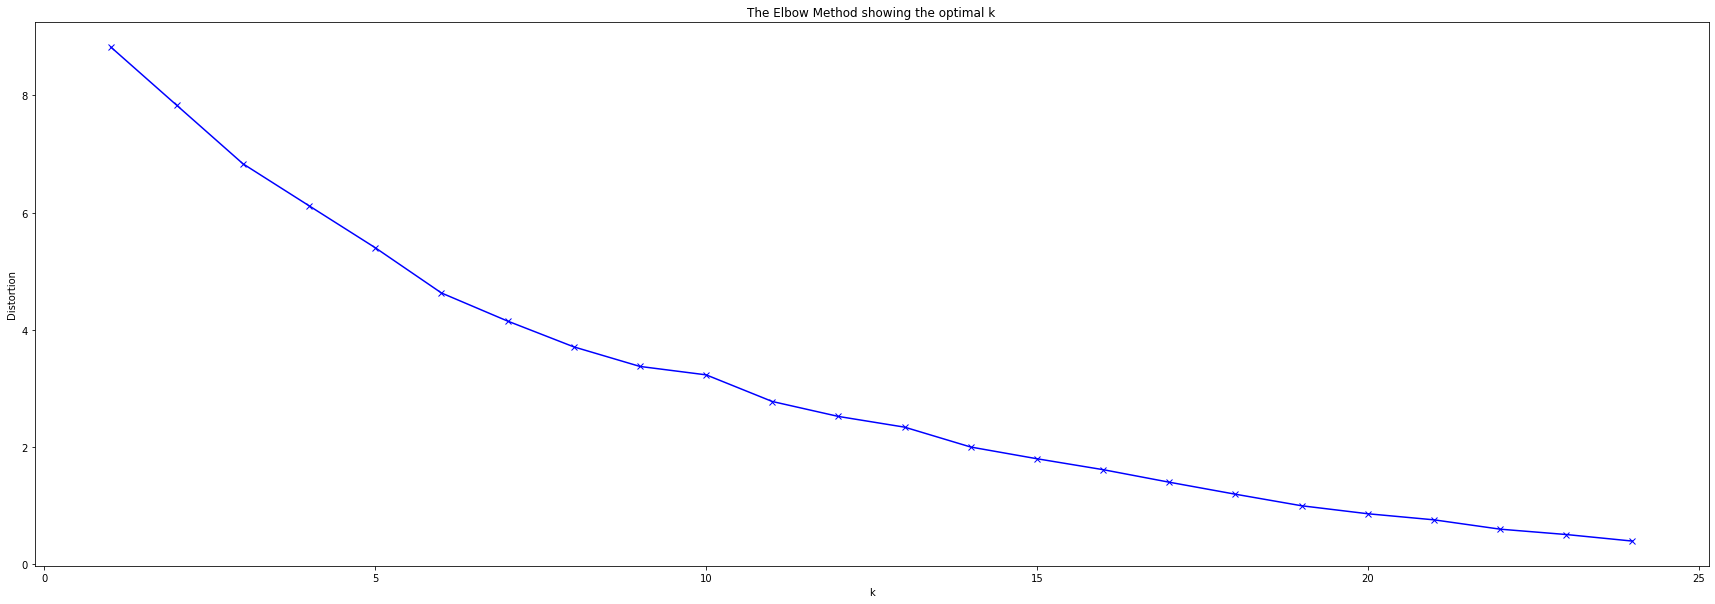

In [50]:
plt.figure(figsize=(30,10))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### Using k-means cluster 

In [51]:
kclusters = 7

cgy_grouped_clustering = cgy_grouped.drop('Neighbourhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cgy_grouped_clustering)

kmeans.labels_[0:10] 

array([0, 4, 3, 3, 3, 0, 5, 5, 3, 3], dtype=int32)

In [52]:
neighbourhoods_venues_sorted.insert(0,'Cluster Labels', kmeans.labels_)
cgy_merged = calgary_city

cgy_merged = cgy_merged.join(neighbourhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

cgy_merged.head() 

,PostalCode,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,T2A,Calgary,"Penbrooke Meadows, Marlborough",51.04968,-113.964320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,T3A,Calgary,"Dalhousie, Edgemont, Hamptons, Hidden Valley",51.12606,-114.143158,5.0,Convenience Store,Asian Restaurant,Gas Station,Café,Fast Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner
2,T2B,Calgary,"Forest Lawn, Dover, Erin Woods",51.03180,-113.978600,5.0,Convenience Store,Bar,Smoke Shop,Yoga Studio,Fast Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner
3,T3B,Calgary,"Montgomery, Bowness, Silver Springs, Greenwood",51.08090,-114.161600,3.0,Coffee Shop,Steakhouse,Food Court,Scenic Lookout,Gift Shop,Gay Bar,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store
4,T2C,Calgary,"Lynnwood Ridge, Ogden, Foothills Industrial, ...",50.98780,-114.000100,0.0,Convenience Store,Clothing Store,Pizza Place,Diner,Yoga Studio,Comic Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant


In [53]:
cgy_merged = cgy_merged[pd.notnull(cgy_merged["Cluster Labels"])].reset_index(drop=True)

In [54]:
cgy_merged.dtypes

PostalCode                 object
Borough                    object
Neighbourhood              object
Latitude                  float64
Longitude                 float64
Cluster Labels            float64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

##### Convert Cluster Lables to integers

In [55]:
cgy_merged["Cluster Labels"] = cgy_merged["Cluster Labels"].astype(int)

In [56]:
cgy_merged.dtypes

PostalCode                 object
Borough                    object
Neighbourhood              object
Latitude                  float64
Longitude                 float64
Cluster Labels              int64
1st Most Common Venue      object
2nd Most Common Venue      object
3rd Most Common Venue      object
4th Most Common Venue      object
5th Most Common Venue      object
6th Most Common Venue      object
7th Most Common Venue      object
8th Most Common Venue      object
9th Most Common Venue      object
10th Most Common Venue     object
dtype: object

In [57]:
clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(cgy_merged['Latitude'], cgy_merged['Longitude'], cgy_merged['Neighbourhood'], cgy_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(clusters)
       
clusters

##### Examining Clusters

In [58]:
#Cluster 0
cgy_merged.loc[cgy_merged['Cluster Labels'] == 0, cgy_merged.columns[[1] + list(range(5, cgy_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Calgary,0,Convenience Store,Clothing Store,Pizza Place,Diner,Yoga Studio,Comic Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant
8,Calgary,0,Pizza Place,Pub,Yoga Studio,Comic Shop,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner
11,Calgary,0,Insurance Office,Pizza Place,Chinese Restaurant,Child Care Service,Yoga Studio,Falafel Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant
16,Calgary,0,Convenience Store,Video Store,Chinese Restaurant,Pharmacy,Pizza Place,Liquor Store,Pub,Yoga Studio,Donut Shop,Cosmetics Shop
18,Calgary,0,Cosmetics Shop,Pizza Place,Liquor Store,Yoga Studio,Comic Shop,Convenience Store,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner
26,Calgary,0,Coffee Shop,Pub,Liquor Store,Convenience Store,Pet Store,Pizza Place,Grocery Store,Bank,Asian Restaurant,Deli / Bodega
28,Calgary,0,Coffee Shop,Pub,Gas Station,Hockey Rink,Ice Cream Shop,Convenience Store,Pharmacy,Pizza Place,Gym,Bistro


In [59]:
#Cluster 1
cgy_merged.loc[cgy_merged['Cluster Labels'] == 1, cgy_merged.columns[[1] + list(range(5, cgy_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,Calgary,1,Hardware Store,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run


In [60]:
#Cluster 2
cgy_merged.loc[cgy_merged['Cluster Labels'] == 2, cgy_merged.columns[[1] + list(range(5, cgy_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Calgary,2,American Restaurant,Skating Rink,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store
20,Calgary,2,American Restaurant,Hotel,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store


In [61]:
#Cluster 3
cgy_merged.loc[cgy_merged['Cluster Labels'] == 3, cgy_merged.columns[[1] + list(range(5, cgy_merged.shape[1]))]]


,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Calgary,3,Coffee Shop,Steakhouse,Food Court,Scenic Lookout,Gift Shop,Gay Bar,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store
4,Calgary,3,Mexican Restaurant,Indian Restaurant,Pub,Sandwich Place,Electronics Store,Bookstore,Middle Eastern Restaurant,Candy Store,Pizza Place,Pool Hall
5,Calgary,3,Noodle House,Brewery,Scenic Lookout,Coffee Shop,Middle Eastern Restaurant,Japanese Restaurant,Chinese Restaurant,Dim Sum Restaurant,Indian Restaurant,Pharmacy
6,Calgary,3,Wine Shop,Vietnamese Restaurant,Coffee Shop,Business Service,Fast Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner
7,Calgary,3,Coffee Shop,Pub,Restaurant,Hotel,Performing Arts Venue,Theater,Italian Restaurant,Deli / Bodega,New American Restaurant,Cocktail Bar
12,Calgary,3,Construction & Landscaping,Moving Target,Dog Run,Falafel Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner
14,Calgary,3,Coffee Shop,Bank,Italian Restaurant,Pharmacy,Pizza Place,Grocery Store,Bakery,Convenience Store,Deli / Bodega,Department Store
17,Calgary,3,Coffee Shop,American Restaurant,Fast Food Restaurant,Mediterranean Restaurant,Chinese Restaurant,Massage Studio,Liquor Store,Pub,Sandwich Place,Comic Shop
19,Calgary,3,Park,Hobby Shop,Furniture / Home Store,Carpet Store,Yoga Studio,Falafel Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant
21,Calgary,3,Pub,Restaurant,Mediterranean Restaurant,Bakery,Sushi Restaurant,Bar,Camera Store,Pizza Place,Nightclub,Brewery


In [62]:
#Cluster 4
cgy_merged.loc[cgy_merged['Cluster Labels'] == 4, cgy_merged.columns[[1] + list(range(5, cgy_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
15,Calgary,4,Dog Run,Yoga Studio,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store


In [63]:
#Cluster 5
cgy_merged.loc[cgy_merged['Cluster Labels'] == 5, cgy_merged.columns[[1] + list(range(5, cgy_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Calgary,5,Convenience Store,Asian Restaurant,Gas Station,Café,Fast Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner
1,Calgary,5,Convenience Store,Bar,Smoke Shop,Yoga Studio,Fast Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner
10,Calgary,5,Gas Station,Pizza Place,Vietnamese Restaurant,Convenience Store,Bar,Dry Cleaner,Donut Shop,Dog Run,Discount Store,Diner
13,Calgary,5,Vietnamese Restaurant,Home Service,Convenience Store,Fast Food Restaurant,Bar,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner
22,Calgary,5,Convenience Store,Home Service,Yoga Studio,Fast Food Restaurant,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store


In [64]:
#Cluster 6
cgy_merged.loc[cgy_merged['Cluster Labels'] == 6, cgy_merged.columns[[1] + list(range(5, cgy_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
24,Calgary,6,Flea Market,Fast Food Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dim Sum Restaurant,Diner,Discount Store,Dog Run



# Results

By looking at the clusters, the following are found to be the Top 3 most common venues (in descending order) per cluster in the city of Calgary:

    * Cluster 0 - Coffee Shop, Convenience Store / Pub / Chinese Restaurant, Liquor Store
    * Cluster 1 - Hardware Store / Fast Food Restaurant / Convenience Store
    * Cluster 2 - American Restaurant / Skating Rink, Hotel / Fast Food Restaurant
    * Cluster 3 - Coffee Shop / {Various} Restaurants / {Various} Restaurants
    * Cluster 4 - Dog Run / Yoga Studio / Fast Food Restaurant
    * Cluster 5 - Convenience Store / Home Service / {Various Stores}
    * Cluster 6 - Flea Market / Fast Food Restaurant / Convenience Store

The most common ones being Restaurant / Food Services in nature.



# Discussion

By looking at the results obtained, one of the first things that was deduced is that the most common venue - in general - in Calgary, are businesses that belong to the food and dining industry. When grouping them by the most common venues, yoga studio was rarely in the Top 3 Most Common Venues for the neighbourhoods in each cluster.

In Cluster 0, Yoga Studios appeared five times. Out of the five times, the highest recorded was as the 3rd Most Common Venue.

In Cluster 3, it was the 5th most common venue for one of the neighbourhoods, the 2nd most common venue for the only neighbourhood in Cluster 4 and the 3rd most common venue for one of two neighbourhoods with a "Yoga Studio" in Cluster 5.

Out of all the clusters, it was the 2nd most common venue in Cluster 4, in the neighbourhood of Brentwood, Collingwood, Nose Hill.

From this information, a few things can be noted based of the criteria the client provided.

   * Density
   * Proximity to Downtown Core
   * Risk Factor

With respect to Density, existing Yoga Studios are not as abundant when compared to the food and dining restaurants in Calgary. Furthermore, they are also distanced enough from each other, as they are scattered across multiple clusters. There are advantages and disadvantages to opening a studio in locations where there are no other yoga studios around the vicinity.

An advantage could be that there is less competition around the general area. Another could be that opening a yoga studio in a different neighbourhood, far from the ones with existing studios could access a group of customers that may have avoided the other studios due to its distance. The accessibility it would create for people wishing to attend a yoga studio located closer to their homes would be appealing to new customers.

However, a disadvantage of opening a yoga studio where there are not a lot of other studios nearby could be a lack of visibility. As most people are creatures of habit, it can be assumed that most people typically stick to travelling and visiting the same area(s) in their day to day lives. This could prove challenging in terms of visibility, as less yoga studio users may be passing by the new studio. This of course, could be mitigated with differnt marketing strategies, but it is something to consider.

Since the existing studios are scattered throughout Calgary, their proximity to downtown Calgary is varied. Selecting a place closer or in downtown could make it accessible to users who work downtown who wish to attend the studio before or after work, minimizing extra commute in their part. However, it can be assumed that the closer the building is to downtown, the higher the cost would be to rent or own a lot.

That being said, selecting a location situated far from downtown and going into the suburbs could have its perks and setbacks as well. It opens the opportunity for family or group yoga classes, should the client wish. It could promote a more "relaxing" or "calming" outside environment for users who are entering or leaving the studio. However, choosing a location far into the suburbs (for example, in the deep south such as the neighbourhood in Cluster 1), could defer those wishing to attend the studio who live far in the North.

Due to the lack of competition, it can be argued that the biggest concern and risk associated would be the chosen location and its associated cost.

# Conclusion

Should the client be willing to take large risks in expanding their business, then expanding their business close to downtown core, would be their best approach. With the freedom of not having that many competitors, they would be able to establish good visibility and with the right marketing, attract new customers to the studio.